<a href="https://colab.research.google.com/github/VivekGangurde94/Mlproject/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# importing algorithm & data split feature
from sklearn.model_selection import train_test_split




In [3]:
import os

In [4]:
src_path='drive/MyDrive/flower_photos'

train_path=os.path.join(src_path,'train')
val_path=os.path.join(src_path,'validation')
tulips_tr, tulips_val = os.path.join(train_path,'tulips'),os.path.join(val_path,'tulips')
sunflowers_tr, sunflowers_val = os.path.join(train_path,'sunflowers'),os.path.join(val_path,'sunflowers')
roses_tr, roses_val = os.path.join(train_path,'roses'),os.path.join(val_path,'roses')
dandelion_tr, dandelion_val = os.path.join(train_path,'dandelion'),os.path.join(val_path,'dandelion')
daisy_tr, daisy_val = os.path.join(train_path,'daisy'),os.path.join(val_path,'daisy')

batch_size=32
training_size=len(os.listdir(tulips_tr))+len(os.listdir(sunflowers_tr))+len(os.listdir(roses_tr))+len(os.listdir(dandelion_tr))+len(os.listdir(daisy_tr))
testing_size=len(os.listdir(tulips_val))+len(os.listdir(sunflowers_val))+len(os.listdir(roses_val))+len(os.listdir(dandelion_val))+len(os.listdir(daisy_val))

In [5]:
len(os.listdir(tulips_tr))+len(os.listdir(sunflowers_tr))+len(os.listdir(roses_tr))+len(os.listdir(dandelion_tr))+len(os.listdir(daisy_tr))

2131

In [6]:
path='drive/MyDrive/flower_photos/train'
os.listdir(path)

['roses', 'sunflowers', 'daisy', 'tulips', 'dandelion']

In [ ]:
os.listdir(roses_tr)

In [8]:
# image visulatization
import cv2
image_path=os.path.join(roses_tr,os.listdir(roses_tr)[11])
image_path



'drive/MyDrive/flower_photos/train/roses/24781114_bc83aa811e_n.jpg'

In [83]:
image_path1=os.path.join(roses_val,os.listdir(roses_tr)[1])
image_path1

'drive/MyDrive/flower_photos/validation/roses/123128873_546b8b7355_n.jpg'

In [9]:
image=cv2.imread(image_path)
image.shape

(256, 320, 3)

In [10]:
[i for i in dir(cv2) if i.__contains__('RGB2BGR')]

['COLOR_RGB2BGR', 'COLOR_RGB2BGR555', 'COLOR_RGB2BGR565', 'COLOR_RGB2BGRA']

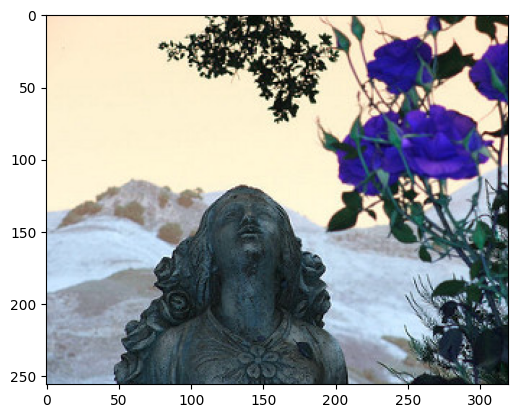

In [11]:

plt.imshow(image)
# this not orginal image matplotlip work on RGB so we dont get ornginal image colour so we have conver into RGB data into BGR

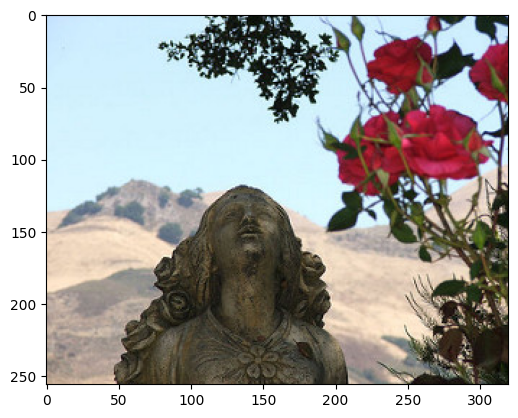

In [12]:
conv=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
plt.imshow(conv)
# her we get orginal image of rose

In [13]:
# Augmenting the data


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# we dont do augmentaion on val data is for only testing
# creating the train data generator
tr_datagen= ImageDataGenerator(rescale=1./255.,
                               rotation_range=40,
                               width_shift_range= 0.2,
                               height_shift_range=0.2,
                               shear_range= 0.2,
                               zoom_range=0.3,
                               horizontal_flip= True,
                               vertical_flip= True,
                               fill_mode='nearest')
# creating the data flow object
train_data= tr_datagen.flow_from_directory(directory=train_path,
                                           batch_size= batch_size,
                                           class_mode='categorical',
                                           target_size=(150,150))



Found 2131 images belonging to 5 classes.


In [17]:
val_datagen = ImageDataGenerator(rescale=1./255.)
# creating the validation dataflow object-4  04
val_data=val_datagen.flow_from_directory(directory=val_path,
                     batch_size= batch_size,
                     class_mode='categorical',
                     target_size=(150,150))

Found 80 images belonging to 5 classes.


In [18]:
import tensorflow as tf


In [19]:
#@title Building the CNN

In [20]:
# instanting the elu activation function
elu=tf.keras.layers.ReLU()
# instaning the adam aptimizer
adam=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.95, beta_2=0.99)

In [21]:
# instantianting the model
cnn=tf.keras.Sequential()

# adding the first con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform',
                              input_shape=(150,150,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the 2nd  con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the 3D con-pooling combo
cnn.add(tf.keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              padding='same',
                              activation=elu,
                              kernel_initializer='he_uniform'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2))

# adding the dropout layer
cnn.add(tf.keras.layers.Dropout(0.3))


#Adding the flatten layer
cnn.add(tf.keras.layers.Flatten())

# addiing the fully connected ANN
# adding the first hidden layer
cnn.add(tf.keras.layers.Dense(units=512,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))

# adding the 2nd hidden layer
cnn.add(tf.keras.layers.Dense(units=512,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))
# adding dropout layer
cnn.add(tf.keras.layers.Dropout(0.3))


# adding the 3rd hidden layer
cnn.add(tf.keras.layers.Dense(units=256,
                             activation='relu',
                             kernel_initializer = 'he_uniform'))
# adding the output layer
cnn.add(tf.keras.layers.Dense(units=5,
                             activation='softmax',
                             kernel_initializer = 'he_uniform'))





In [22]:
# compiling the model
cnn.compile(optimizer= 'RMSprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [23]:
# summary
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [28]:
history_obj1  = cnn.fit(train_data,
                        epochs=6,
                        batch_size= batch_size,
                        steps_per_epoch=training_size//batch_size,
                        validation_data= val_data,
                        validation_steps= testing_size//batch_size,
                        use_multiprocessing=True,workers=70)

Epoch 1/6
66/66 [==============================] - 248s 4s/step - loss: 1.2732 - accuracy: 0.4883 - val_loss: 1.2156 - val_accuracy: 0.4688
Epoch 2/6
66/66 [==============================] - 246s 4s/step - loss: 1.2089 - accuracy: 0.4950 - val_loss: 1.0685 - val_accuracy: 0.5156
Epoch 3/6
66/66 [==============================] - 246s 4s/step - loss: 1.1196 - accuracy: 0.5545 - val_loss: 1.0819 - val_accuracy: 0.6094
Epoch 4/6
66/66 [==============================] - 236s 3s/step - loss: 1.0988 - accuracy: 0.5684 - val_loss: 1.2297 - val_accuracy: 0.5625
Epoch 5/6
66/66 [==============================] - 238s 4s/step - loss: 1.0193 - accuracy: 0.6122 - val_loss: 0.9851 - val_accuracy: 0.5469
Epoch 6/6
66/66 [==============================] - 253s 4s/step - loss: 0.9966 - accuracy: 0.6127 - val_loss: 0.8993 - val_accuracy: 0.7188


In [31]:
history_obj1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

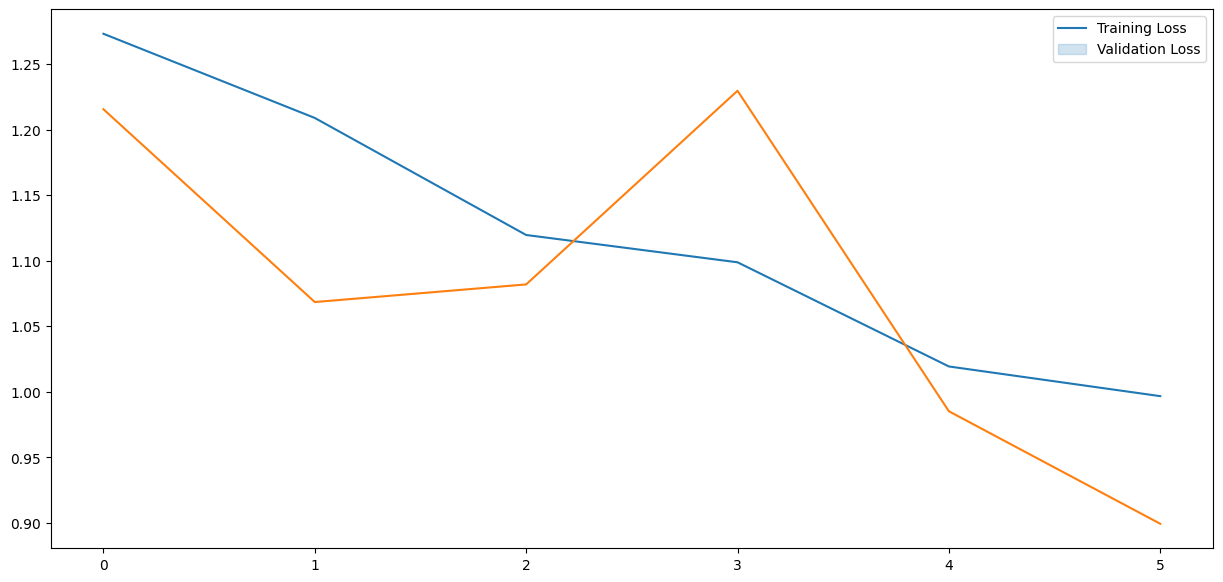

In [32]:
epochs = history_obj1.epoch
tr_loss = history_obj1.history.get('loss')
val_loss = history_obj1.history.get('val_loss')

plt.figure(figsize=(15,7))
sns.lineplot(x = epochs, y = tr_loss)
sns.lineplot(x = epochs, y = val_loss)
plt.legend(['Training Loss','Validation Loss'])
plt.show()

In [87]:
cnn.evaluate(val_data,verbose=1,)

3/3 [==============================] - 2s 430ms/step - loss: 0.8902 - accuracy: 0.7000


[0.8902390599250793, 0.699999988079071]